In [88]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


def get_path(fname):
    return os.sep.join([fname])


flist = ['DD1.csv','DD2.csv','DD3.csv', 'DD4.csv']
cols = ['Id', 'Activity', 'Start', 'End', 'Duration', 'Hour']

d = []
for fitem in flist:
    data = pd.read_csv(get_path(fitem), sep=',', names=cols, skiprows=1)
    data.drop(['Id'], axis=1, inplace=True)
    #data.drop(['Hour'], axis=1, inplace=True)
    data['Start'] = pd.to_datetime(data['Start'])
    data['End'] = pd.to_datetime(data['End'])
    d.append(data)

d1 = d[0]
d2 = d[1]
d3 = d[2]
d4 = d[3]

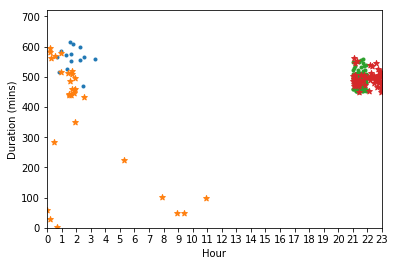

In [89]:
# Plot data points against start time 
plt.xlim(0, 23)
plt.xticks(range(24))
plt.ylim(0, 720)
plt.xlabel('Hour')
plt.ylabel('Duration (mins)')

plt.scatter(d1['Hour'], d1['Duration'], marker='.')
plt.scatter(d2['Hour'], d2['Duration'], marker='*')
plt.scatter(d3['Hour'], d3['Duration'], marker='.')
plt.scatter(d4['Hour'], d4['Duration'], marker='*')
plt.show()



In [291]:
mad = lambda x: np.fabs(x - x.mean()).mean()

win_size = 2

#d2
d2['Day'] = d2['Start'].map(lambda x: x.dayofweek)
d2['Is_Weekend'] = d2['Day'].map(lambda x: 1 if x in [5, 6] else 0)
d2['D'] = d2['Duration']
d2['Mad'] = d2['D'].rolling(win_size, min_periods=1).apply(mad)
d2['Mean'] = d2['D'].rolling(win_size, min_periods=1).mean()
d2['Min'] = d2['D'].rolling(win_size, min_periods=1).min()
d2['Max'] = d2['D'].rolling(win_size, min_periods=1).max()
d2['Std'] = d2['D'].rolling(win_size, min_periods=1).std()
d2['Var'] = d2['D'].rolling(win_size, min_periods=1).var()
d2.head(5)

#d3
d3['Day'] = d3['Start'].map(lambda x: x.dayofweek)
d3['Is_Weekend'] = d3['Day'].map(lambda x: 1 if x in [5, 6] else 0)
d3['D'] = d3['Duration']
d3['Mad'] = d3['D'].rolling(win_size, min_periods=1).apply(mad)
d3['Mean'] = d3['D'].rolling(win_size, min_periods=1).mean()
d3['Min'] = d3['D'].rolling(win_size, min_periods=1).min()
d3['Max'] = d3['D'].rolling(win_size, min_periods=1).max()
d3['Std'] = d3['D'].rolling(win_size, min_periods=1).std()
d3['Var'] = d3['D'].rolling(win_size, min_periods=1).var()
d2.head(50)

,Activity,Start,End,Duration,Hour,Day,Is_Weekend,D,Mad,Mean,Min,Max,Std,Var
0,Sleeping,2012-11-12 01:54:00,2012-11-12 09:31:59,457.983333,1.900000,0,0,457.983333,0.000000,457.983333,457.983333,457.983333,NaN,NaN
1,Sleeping,2012-11-13 01:30:00,2012-11-13 08:52:59,442.983333,1.500000,1,0,442.983333,7.500000,450.483333,442.983333,457.983333,10.606602,112.500000
2,Sleeping,2012-11-14 00:29:00,2012-11-14 05:12:59,283.983333,0.483333,2,0,283.983333,79.500000,363.483333,283.983333,442.983333,112.429978,12640.500000
3,Sleeping,2012-11-14 05:16:00,2012-11-14 09:01:59,225.983333,5.266667,2,0,225.983333,29.000000,254.983333,225.983333,283.983333,41.012193,1682.000000
4,Sleeping,2012-11-15 00:10:00,2012-11-15 00:39:59,29.983333,0.166667,3,0,29.983333,98.000000,127.983333,29.983333,225.983333,138.592929,19208.000000
5,Sleeping,2012-11-15 00:40:00,2012-11-15 00:43:59,3.983333,0.666667,3,0,3.983333,13.000000,16.983333,3.983333,29.983333,18.384776,338.000000
6,Sleeping,2012-11-15 01:55:00,2012-11-15 07:46:59,351.983333,1.916667,3,0,351.983333,174.000000,177.983333,3.983333,351.983333,246.073160,60552.000000
7,Sleeping,2012-11-15 07:53:00,2012-11-15 09:34:59,101.983333,7.883333,3,0,101.983333,125.000000,226.983333,101.983333,351.983333,176.776695,31250.000000
8,Sleeping,2012-11-16 00:58:00,2012-11-16 10:37:59,579.983333,0.966667,4,0,579.983333,239.000000,340.983333,101.983333,579.983333,337.997041,114242.000000
9,Sleeping,2012-11-17 02:34:00,2012-11-17 09:46:59,432.983333,2.566667,5,1,432.983333,73.500000,506.483333,432.983333,579.983333,103.944697,10804.500000


In [288]:
d3_dataset = d3[['Hour', 'Day', 'Is_Weekend', 'Mad', 'Mean', 'Min', 'Max', 'Std', 'Var']].values
d3_dataset = d3[['Hour', 'Day', 'Is_Weekend', 'D',]].values
d3_dataset = np.nan_to_num(d3_dataset)
d3_dataset = d3_dataset[1:-1, 0:]


d2_dataset = d2[['Hour', 'Day', 'Is_Weekend', 'Mad', 'Mean', 'Min', 'Max', 'Std', 'Var']].values
d2_dataset = d2[['Hour', 'Day', 'Is_Weekend', 'D',]].values
d2_dataset = np.nan_to_num(d2_dataset)
d2_dataset = d2_dataset[1:-1, 0:]

d2_d3 = np.concatenate((d3_dataset, d2_dataset), axis=0)
d2_d3.shape

(124, 4)

In [289]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

d2_scaled = scaler.fit_transform(d2_dataset)

d3_scaled = scaler.fit_transform(d3_dataset)

#d2_d3_scaled = scaler.fit_transform(d2_d3)

In [290]:
from sklearn import svm
X_train = d3_scaled[:75, :]
X_test = d3_scaled[75:, :]
X_outliers = d2_scaled[:, :]

# fit the model
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


print(X_train.shape[0])
print(X_test.shape[0])
print(X_outliers.shape[0])
print(n_error_train)
print(n_error_test)
print(n_error_outliers)


75
22
27
2
1
25


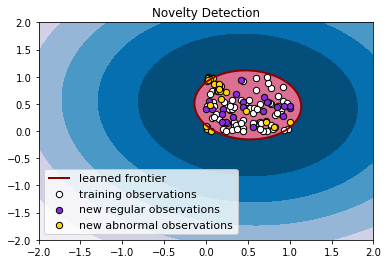

In [282]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,edgecolors='k')
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.legend([a.collections[0], b1, b2, c], 
           ["learned frontier", "training observations", "new regular observations", "new abnormal observations"],
           loc="lower left", prop=matplotlib.font_manager.FontProperties(size=11))
#plt.xlabel("error train: %d/200 ; errors novel regular: %d/40 errors novel abnormal: %d/40" % (n_error_train, n_error_test, n_error_outliers))
plt.show()